<a href="https://colab.research.google.com/github/lazy-wolf/Sample/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 4**

```
# Authoured by: Wasim Dawood Shaik
# UNB ID: 3744476
# Date: 4-12-2023
```

**Import Libraries**

In [1]:
import tensorflow as tf
from keras.layers import Input, Dense, Reshape, Lambda
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools

**Importing Dataset**

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 7s 0us/step


In [3]:
x_train, y_train = x_train[:10000], y_train[:10000]

In [4]:
x_test, y_test = x_train[:2000], y_train[:2000]

**Dataset Info**

[cifar10 datset link](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data)

*https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data*

In [5]:
x_train.shape

(10000, 32, 32, 3)

In [6]:
x_test.shape

(2000, 32, 32, 3)

**Data Preprocessing**

In [7]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

**Auto-Encoder (AE) Implementation**

**Auto-Encoder Model Architecture**

In [8]:
#Input Layer
input_img = Input(shape=(32, 32, 3))
#Encoding Layer
x = Reshape((32*32*3,))(input_img)
x = Dense(3000, activation='relu')(x)
x = Dense(1500, activation='relu')(x)
x = Dense(750, activation='relu')(x)
encoded = Dense(350, activation='relu')(x)
#Decoding Layer
x = Dense(750, activation='relu')(encoded)
x = Dense(1500, activation='relu')(x)
x = Dense(3000, activation='relu')(x)
x = Dense(32*32*3, activation='sigmoid')(x)
decoded = Reshape((32, 32, 3))(x)
#AutoEncoder Model
autoencoder = Model(input_img, decoded)

**Compiling the Auto-Encoder**

In [9]:
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.002), loss='mse')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 reshape (Reshape)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 1500)              4501500   
                                                                 
 dense_2 (Dense)             (None, 750)               1125750   
                                                                 
 dense_3 (Dense)             (None, 350)               262850    
                                                                 
 dense_4 (Dense)             (None, 750)               263250

**Auto-Encoder Training**

In [10]:
#Training the AutoEncoder Model
history = autoencoder.fit(x_train, x_train, validation_data=(x_test, x_test), epochs=50, batch_size=32)

Epoch 1/50
313/313 [==============================] - 12s 13ms/step - loss: 0.0465 - val_loss: 0.0372
Epoch 2/50
313/313 [==============================] - 4s 12ms/step - loss: 0.0374 - val_loss: 0.0370
Epoch 3/50
313/313 [==============================] - 4s 13ms/step - loss: 0.0373 - val_loss: 0.0373
Epoch 4/50
313/313 [==============================] - 4s 11ms/step - loss: 0.0369 - val_loss: 0.0339
Epoch 5/50
313/313 [==============================] - 4s 12ms/step - loss: 0.0332 - val_loss: 0.0327
Epoch 6/50
313/313 [==============================] - 4s 12ms/step - loss: 0.0329 - val_loss: 0.0327
Epoch 7/50
313/313 [==============================] - 4s 12ms/step - loss: 0.0329 - val_loss: 0.0327
Epoch 8/50
313/313 [==============================] - 4s 12ms/step - loss: 0.0327 - val_loss: 0.0326
Epoch 9/50
313/313 [==============================] - 4s 12ms/step - loss: 0.0321 - val_loss: 0.0305
Epoch 10/50
313/313 [==============================] - 4s 13ms/step - loss: 0.0308 - val_l

In [11]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

**Plot Training History**


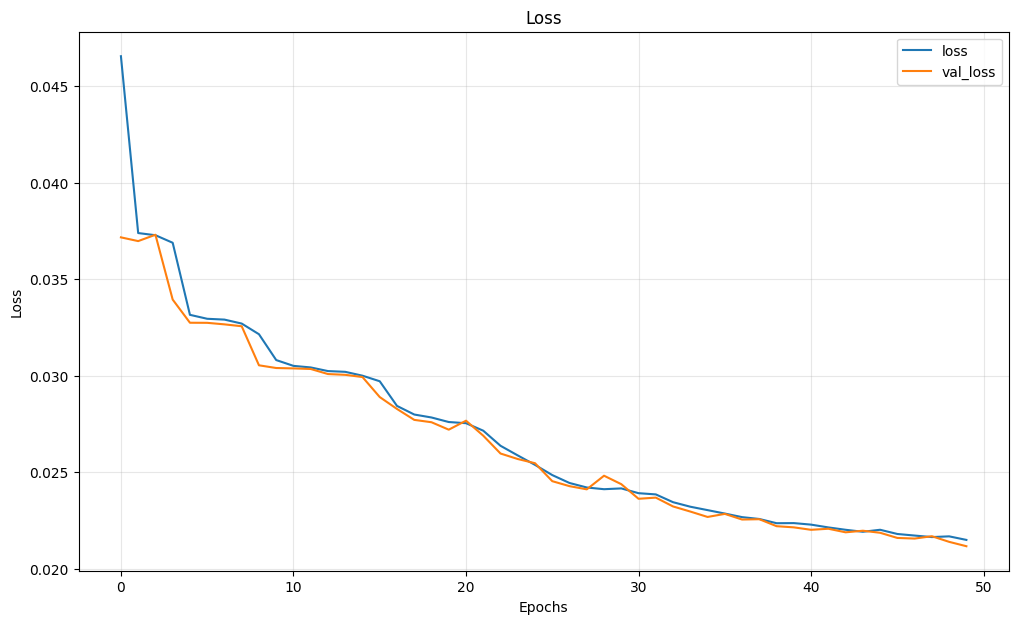

In [12]:
plt.figure(figsize=(12,7))

plt.plot(history.epoch, history.history['loss'], label="loss")
plt.plot(history.epoch, history.history['val_loss'], label="val_loss")

plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(alpha=0.3)
plt.legend()

plt.show()

**Auto-Encoder Evaluation**

In [13]:
results=autoencoder.evaluate(x_test, x_test)
print("Test Loss MSE : ", results)

63/63 [==============================] - 0s 4ms/step - loss: 0.0212
Test Loss MSE :  0.021171489730477333


**Auto Encoder Test Dataset Reconstruction**

In [14]:
x_test_pred = autoencoder.predict(x_test)

63/63 [==============================] - 0s 3ms/step


In [15]:
def calculate_reconstruction_losses(original, reconstructed):
    mse_loss = tf.keras.losses.mean_squared_error(original.flatten(), reconstructed.flatten()).numpy()
    bce_loss = tf.keras.losses.binary_crossentropy(original.flatten(), reconstructed.flatten()).numpy()
    return mse_loss, bce_loss

In [16]:
calculate_reconstruction_losses(x_test, x_test_pred)

(0.02117149, 0.6010187)

**Reconstruction Quality : Auto-Encoder**

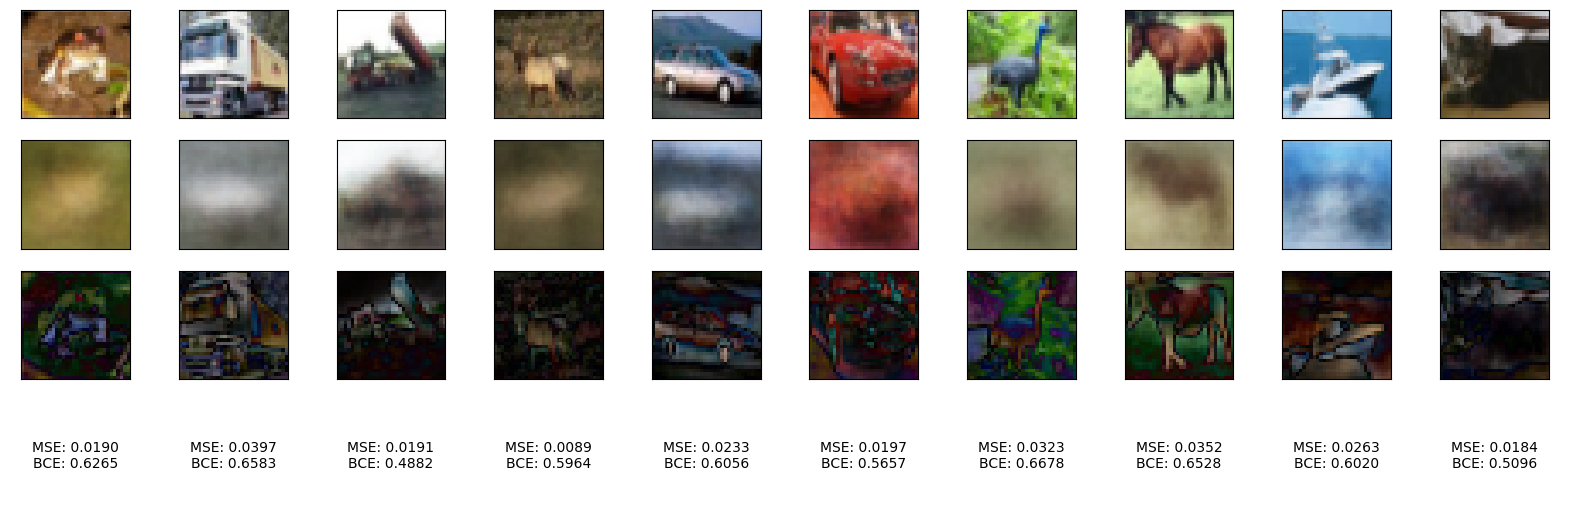

In [17]:
n = 10  # How many image rows, we will display
plt.figure(figsize=(20, 6 + 0.5))  # Adjust the figure size to accommodate three rows
for i in range(n):
    # Display original
    ax = plt.subplot(4, n, i + 1)
    original_img = x_test[i]
    plt.imshow(original_img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(4, n, i + 1 + n)
    reconstructed_img = x_test_pred[i]
    plt.imshow(reconstructed_img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display difference
    ax = plt.subplot(4, n, i + 1 + n * 2)
    difference = np.abs(original_img - reconstructed_img)
    plt.imshow(difference)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Calculate losses
    mse_loss, bce_loss = calculate_reconstruction_losses(original_img, reconstructed_img)

    # Add captions with losses
    ax = plt.subplot(4, n, i + 1 + n * 3)
    plt.axis('off')
    loss_caption = f"MSE: {mse_loss:.4f}\nBCE: {bce_loss:.4f}"
    plt.text(0.5, 0.5, loss_caption, ha='center', va='center', fontsize=10, transform=ax.transAxes)

plt.show()

**Hyperparameter Tuning**



```
# Hyperparameters Choosed : Additional Layer, Learning Rate, Encoding Dimension/ Latent Space Dimension
```



In [18]:
def hyperparameter_tuning_strategy(cofig, x_train, x_test):
  additional_layer, learning_rate, encoding_dim = config
  possible_combinations = list(itertools.product(additional_layer, learning_rate, encoding_dim))
  print("*"*25)
  print(f"Possible No.of Combinations : {possible_combinations}")
  print("*"*25)
  hist = []
  for i in range(len(possible_combinations)):
    print("*"*25)
    print(f"Combination : {i+1}")
    print("*"*25)
    additional_layer, learning_rate, encoding_dim = possible_combinations[i]
    #Input Layer
    input_img = Input(shape=(32, 32, 3))
    #Encoding Layer
    x = Reshape((32*32*3,))(input_img)
    x = Dense(3000, activation='relu')(x)
    if additional_layer:
      x = Dense(1500, activation='relu')(x)
    x = Dense(750, activation='relu')(x)
    encoded = Dense(encoding_dim, activation='relu')(x)
    #Decoding Layer
    x = Dense(750, activation='relu')(encoded)
    if additional_layer:
      x = Dense(1500, activation='relu')(x)
    x = Dense(3000, activation='relu')(x)
    x = Dense(32*32*3, activation='sigmoid')(x)
    decoded = Reshape((32, 32, 3))(x)
    #AutoEncoder Model
    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')
    #Training the AutoEncoder Model
    autoencoder.fit(x_train, x_train, validation_data=(x_test, x_test), epochs=50, batch_size=32)
    test_loss = autoencoder.evaluate(x_test, x_test)
    hist.append(list((additional_layer, learning_rate, encoding_dim, test_loss)))
    print(f"Combination : {i+1} -> {possible_combinations[i]} test_mse : {test_loss}")
    print("*"*25)
    print("*"*25)
  return hist


**Different HyperParameter Cofigurations for Tuning**

In [19]:
config = [[True, False], [0.001, 0.002], [175, 350]]

hist = hyperparameter_tuning_strategy(config, x_train, x_test)

*************************
Possible No.of Combinations : [(True, 0.001, 175), (True, 0.001, 350), (True, 0.002, 175), (True, 0.002, 350), (False, 0.001, 175), (False, 0.001, 350), (False, 0.002, 175), (False, 0.002, 350)]
*************************
*************************
Combination : 1
*************************
Epoch 1/50
313/313 [==============================] - 6s 13ms/step - loss: 0.0454 - val_loss: 0.0369
Epoch 2/50
313/313 [==============================] - 4s 11ms/step - loss: 0.0337 - val_loss: 0.0328
Epoch 3/50
313/313 [==============================] - 4s 13ms/step - loss: 0.0325 - val_loss: 0.0314
Epoch 4/50
313/313 [==============================] - 4s 11ms/step - loss: 0.0309 - val_loss: 0.0304
Epoch 5/50
313/313 [==============================] - 4s 12ms/step - loss: 0.0305 - val_loss: 0.0300
Epoch 6/50
313/313 [==============================] - 4s 12ms/step - loss: 0.0289 - val_loss: 0.0277
Epoch 7/50
313/313 [==============================] - 4s 12ms/step - loss: 0.02

**Different HyperParameter Value's Test Losses Comparison**

In [20]:
hist_hp_comb = pd.DataFrame(hist, columns=["Additional Layer", "Learning Rate", "Encoding Dimesnionality/Latent Space Dimensionality","Test Loss"])
hist_hp_comb = hist_hp_comb.sort_values(by=["Test Loss"], ascending=True)
hist_hp_comb

,Additional Layer,Learning Rate,Encoding Dimesnionality/Latent Sapce Dimensionality,Test Loss
5,False,0.001,350,0.007453
4,False,0.001,175,0.009728
1,True,0.001,350,0.011635
0,True,0.001,175,0.013830
7,False,0.002,350,0.015083
3,True,0.002,350,0.021267
2,True,0.002,175,0.022597
6,False,0.002,175,0.023649


**Reconstruction Quality Changes After HyperParameter Tuning**

In [21]:
print("*"*25)
print(f"----Best Combination---- \n Additional Layer = {hist_hp_comb.iloc[0,0]}\n Learning Rate = {hist_hp_comb.iloc[0,1]}\n Encoding Dimesnionality/Latent Sapce Dimensionality = {hist_hp_comb.iloc[0,2]}\n")
print("*"*25)
print("*"*25)
before_mse = np.round(results, 4)
after_mse = np.round(hist_hp_comb.iloc[0, 3], 4)
print(f'Results Before Tunning:\n Test Loss MSE: {before_mse}\n')
print(f'Results After Tunning:\n Test Loss MSE: {after_mse}\n')
print(f'{np.round((before_mse-after_mse)*100/before_mse)}% Reconstruction Quality Improvement')

*************************
----Best Combination---- 
 Additional Layer = False
 Learning Rate = 0.001
 Encoding Dimesnionality/Latent Sapce Dimensionality = 350

*************************
*************************
Results Before Tunning:
 Test Loss MSE: 0.0212

Results After Tunning:
 Test Loss MSE: 0.0075

65.0% Reconstruction Quality Improvement


**Best AutoEncoder Model after Tuning**

In [22]:
additional_layer, learning_rate, encoding_dim = list(hist_hp_comb.iloc[0, :3])

**Best Auto-Encoder Architecture**

In [23]:
#Input Layer
input_img = Input(shape=(32, 32, 3))
#Encoding Layer
x = Reshape((32*32*3,))(input_img)
x = Dense(3000, activation='relu')(x)
if additional_layer:
  x = Dense(1500, activation='relu')(x)
x = Dense(750, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)
#Decoding Layer
x = Dense(750, activation='relu')(encoded)
if additional_layer:
  x = Dense(1500, activation='relu')(x)
x = Dense(3000, activation='relu')(x)
x = Dense(32*32*3, activation='sigmoid')(x)
decoded = Reshape((32, 32, 3))(x)

**Compiling the Best Auto-Encoder**

In [24]:
#AutoEncoder Model
autoencoder_best = Model(input_img, decoded)
autoencoder_best.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')
autoencoder_best.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 reshape_18 (Reshape)        (None, 3072)              0         
                                                                 
 dense_64 (Dense)            (None, 3000)              9219000   
                                                                 
 dense_65 (Dense)            (None, 750)               2250750   
                                                                 
 dense_66 (Dense)            (None, 350)               262850    
                                                                 
 dense_67 (Dense)            (None, 750)               263250    
                                                                 
 dense_68 (Dense)            (None, 3000)              2253

**Best Autoencoder - Encoder Model**

In [25]:
# Define the encoder model
ae_encoder_best = Model(input_img, encoded)

**Best Auto-Encoder Training**

In [26]:
#Training the AutoEncoder Model
history = autoencoder_best.fit(x_train, x_train, validation_data=(x_test, x_test), epochs=50, batch_size=32)


Epoch 1/50
313/313 [==============================] - 5s 10ms/step - loss: 0.0392 - val_loss: 0.0311
Epoch 2/50
313/313 [==============================] - 3s 10ms/step - loss: 0.0285 - val_loss: 0.0256
Epoch 3/50
313/313 [==============================] - 3s 10ms/step - loss: 0.0243 - val_loss: 0.0233
Epoch 4/50
313/313 [==============================] - 3s 10ms/step - loss: 0.0226 - val_loss: 0.0222
Epoch 5/50
313/313 [==============================] - 3s 10ms/step - loss: 0.0217 - val_loss: 0.0217
Epoch 6/50
313/313 [==============================] - 3s 9ms/step - loss: 0.0210 - val_loss: 0.0208
Epoch 7/50
313/313 [==============================] - 3s 10ms/step - loss: 0.0202 - val_loss: 0.0192
Epoch 8/50
313/313 [==============================] - 3s 10ms/step - loss: 0.0191 - val_loss: 0.0187
Epoch 9/50
313/313 [==============================] - 3s 10ms/step - loss: 0.0184 - val_loss: 0.0180
Epoch 10/50
313/313 [==============================] - 3s 10ms/step - loss: 0.0178 - val_los

**Plot Training History**

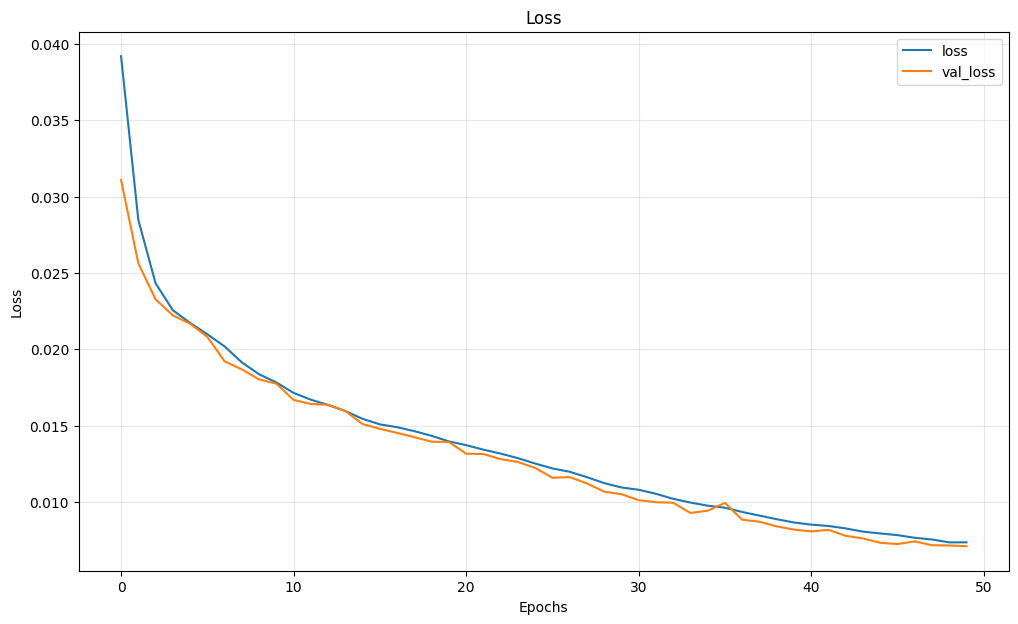

In [27]:
plt.figure(figsize=(12,7))

plt.plot(history.epoch, history.history['loss'], label="loss")
plt.plot(history.epoch, history.history['val_loss'], label="val_loss")

plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(alpha=0.3)
plt.legend()

plt.show()

**Best Auto-Encoder Evaluation**

In [28]:
test_loss = autoencoder_best.evaluate(x_test, x_test)
print("Test Loss MSE : ", test_loss)

63/63 [==============================] - 0s 3ms/step - loss: 0.0071
Test Loss MSE :  0.00709631759673357


**Best Auto Encoder Test Dataset Reconstruction**

In [29]:
x_test_pred = autoencoder_best.predict(x_test)
mse_loss, bce_loss = calculate_reconstruction_losses(x_test, x_test_pred)
(mse_loss, bce_loss)

63/63 [==============================] - 0s 2ms/step


(0.0070963185, 0.5678291)

**Reconstruction Quality : Best Auto-Encoder**

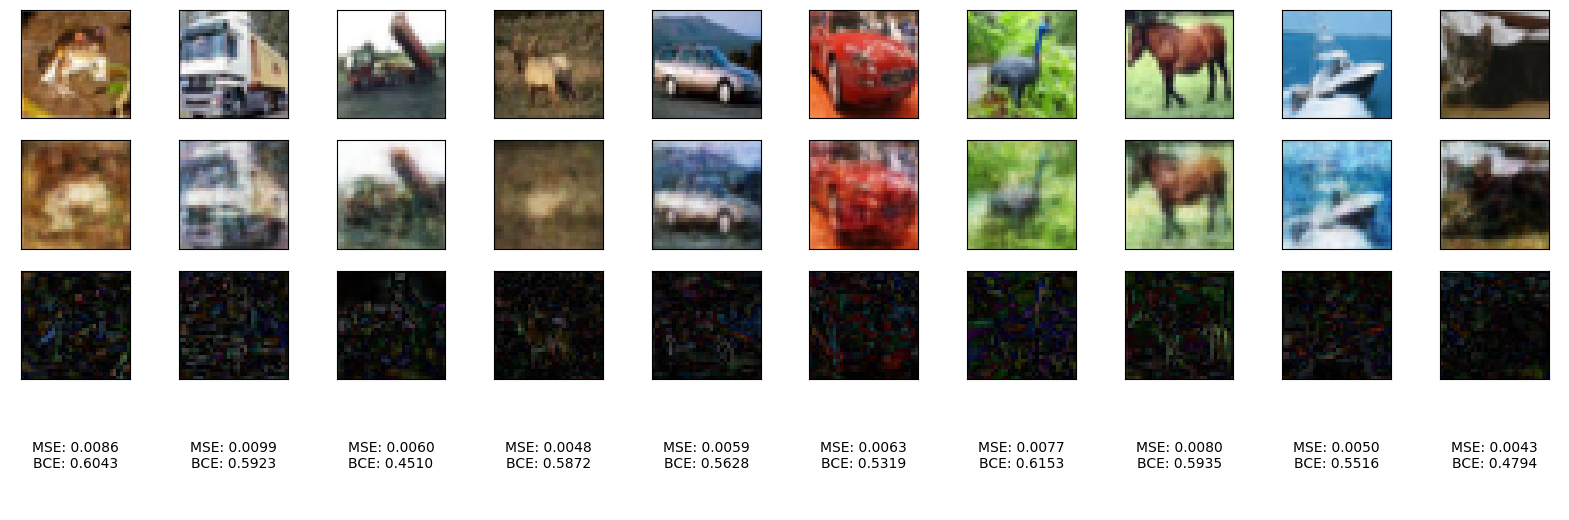

In [30]:
n = 10  # # How many image rows, we will display
plt.figure(figsize=(20, 6 + 0.5))  # Adjust the figure size to accommodate three rows
for i in range(n):
    # Display original
    ax = plt.subplot(4, n, i + 1)
    original_img = x_test[i]
    plt.imshow(original_img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(4, n, i + 1 + n)
    reconstructed_img = x_test_pred[i]
    plt.imshow(reconstructed_img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display difference
    ax = plt.subplot(4, n, i + 1 + n * 2)
    difference = np.abs(original_img - reconstructed_img)
    plt.imshow(difference)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Calculate losses
    mse_loss, bce_loss = calculate_reconstruction_losses(original_img, reconstructed_img)

    # Add captions with losses
    ax = plt.subplot(4, n, i + 1 + n * 3)
    plt.axis('off')
    loss_caption = f"MSE: {mse_loss:.4f}\nBCE: {bce_loss:.4f}"
    plt.text(0.5, 0.5, loss_caption, ha='center', va='center', fontsize=10, transform=ax.transAxes)

plt.show()

**Variational Auto-Encoder (VAE) Implementation**

**Variational Auto-Encoder Model Architecture**

In [31]:
# Hyperparameters
batch_size = 32
original_dim = 3072  # 32*32*3
latent_dim = 2
intermediate_dim = 128
epochs = 50
epsilon_std = 1.0

# Encoder network
x = Input(shape=(original_dim,), name='input')
h = Dense(intermediate_dim, activation='relu', name='encoding')(x)
z_mean = Dense(latent_dim, name='mean')(h)
z_log_var = Dense(latent_dim, name='log-variance')(h)

# Sampling function
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon

# Sample from the latent distribution
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decoder network
decoder_h = Dense(intermediate_dim, activation='relu', name='decoder_h')
decoder_mean = Dense(original_dim, activation='sigmoid', name='decoder_mean')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# VAE model
vae = Model(x, x_decoded_mean)

# Loss function: reconstruction loss + KL divergence
reconstruction_loss = binary_crossentropy(x, x_decoded_mean) * original_dim
kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer=Adam(learning_rate=0.002))

In [32]:
x_train.shape

(10000, 32, 32, 3)

In [33]:
x_train_vae = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_vae = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

**Variational Auto-Encoder Model Training**

In [34]:
#Training the AutoEncoder Model
history = vae.fit(x_train_vae, x_train_vae, epochs=epochs, batch_size=batch_size, validation_data=(x_test_vae, x_test_vae))

Epoch 1/50
313/313 [==============================] - 5s 7ms/step - loss: 2020.3395 - val_loss: 1976.0521
Epoch 2/50
313/313 [==============================] - 2s 6ms/step - loss: 1963.5891 - val_loss: 1966.5126
Epoch 3/50
313/313 [==============================] - 1s 5ms/step - loss: 1960.2388 - val_loss: 1965.2938
Epoch 4/50
313/313 [==============================] - 1s 5ms/step - loss: 1958.5629 - val_loss: 1964.7008
Epoch 5/50
313/313 [==============================] - 1s 5ms/step - loss: 1957.4591 - val_loss: 1968.5593
Epoch 6/50
313/313 [==============================] - 1s 4ms/step - loss: 1956.9297 - val_loss: 1963.6200
Epoch 7/50
313/313 [==============================] - 1s 5ms/step - loss: 1956.2610 - val_loss: 1962.4644
Epoch 8/50
313/313 [==============================] - 1s 5ms/step - loss: 1956.0459 - val_loss: 1962.3453
Epoch 9/50
313/313 [==============================] - 2s 5ms/step - loss: 1955.6256 - val_loss: 1961.9980
Epoch 10/50
313/313 [=========================

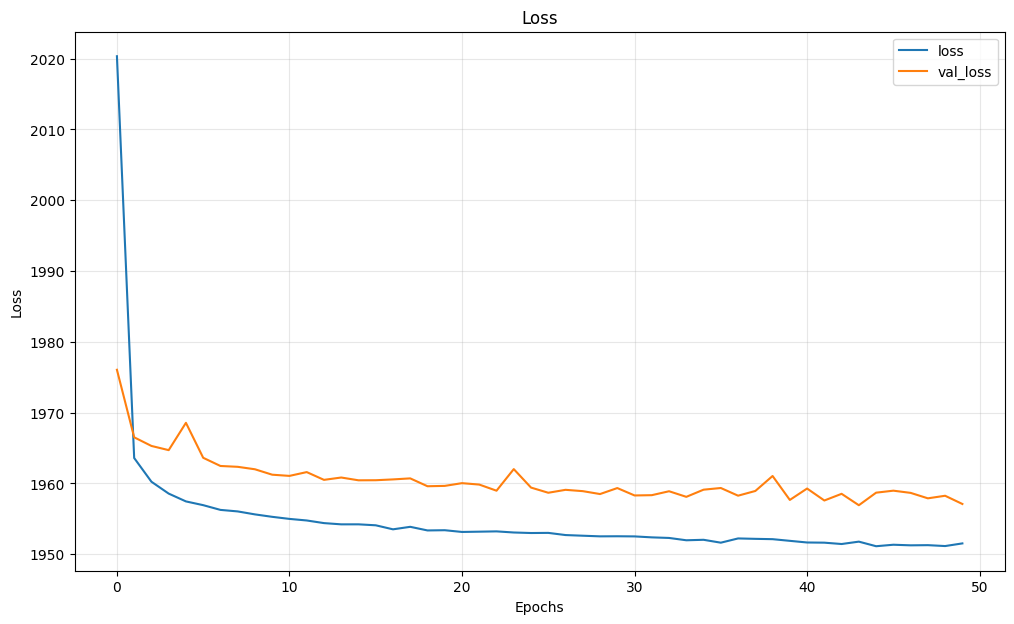

In [35]:
plt.figure(figsize=(12,7))

plt.plot(history.epoch, history.history['loss'], label="loss")
plt.plot(history.epoch, history.history['val_loss'], label="val_loss")

plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(alpha=0.3)
plt.legend()

plt.show()

In [36]:
results = vae.evaluate(x_test_vae, x_test_vae)
print("Test Loss VAE : ", results)

63/63 [==============================] - 0s 2ms/step - loss: 1957.0736
Test Loss VAE :  1957.0736083984375


In [37]:
x_test_pred = vae.predict(x_test_vae)

63/63 [==============================] - 0s 2ms/step


In [38]:
mse_loss, bce_loss = calculate_reconstruction_losses(x_test_vae, x_test_pred)
(mse_loss, bce_loss)

(0.03634425, 0.6351907)

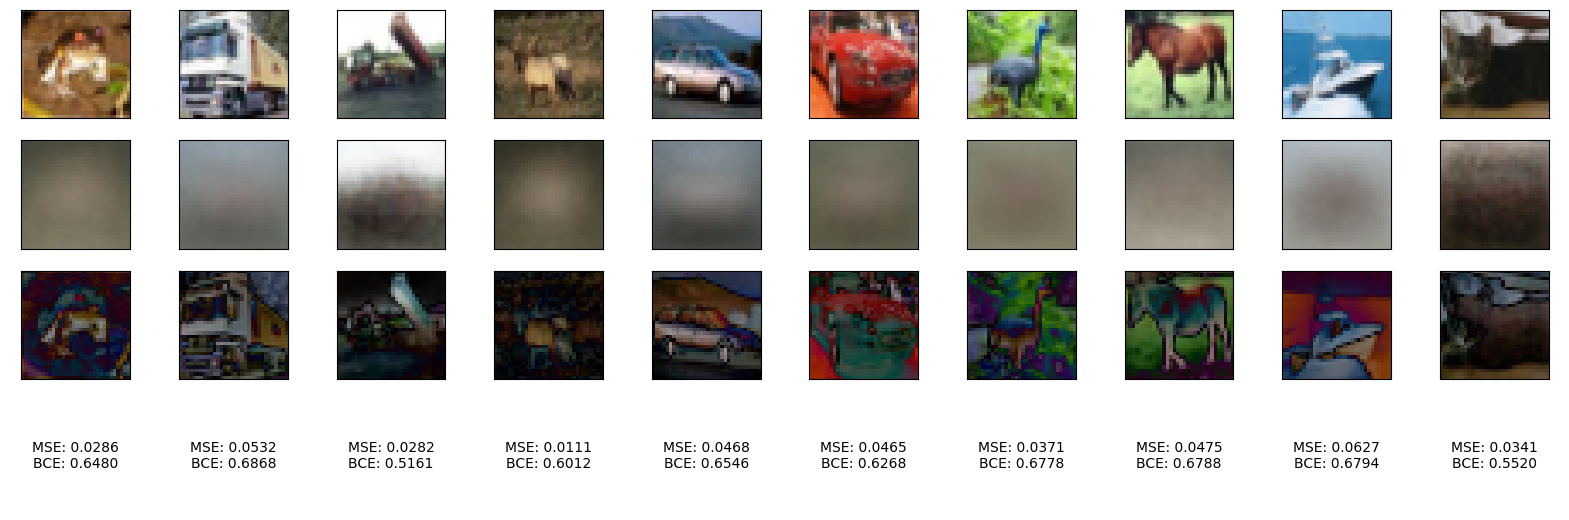

In [39]:
n = 10  # # How many image rows, we will display
plt.figure(figsize=(20, 6 + 0.5))  # Adjust the figure size to accommodate three rows
for i in range(n):
    # Display original
    ax = plt.subplot(4, n, i + 1)
    original_img = x_test_vae[i].reshape(32,32,3)
    plt.imshow(original_img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(4, n, i + 1 + n)
    reconstructed_img = x_test_pred[i].reshape(32,32,3)
    plt.imshow(reconstructed_img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display difference
    ax = plt.subplot(4, n, i + 1 + n * 2)
    difference = np.abs(original_img - reconstructed_img)
    plt.imshow(difference)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Calculate losses
    mse_loss, bce_loss = calculate_reconstruction_losses(original_img, reconstructed_img)

    # Add captions with losses
    ax = plt.subplot(4, n, i + 1 + n * 3)
    plt.axis('off')
    loss_caption = f"MSE: {mse_loss:.4f}\nBCE: {bce_loss:.4f}"
    plt.text(0.5, 0.5, loss_caption, ha='center', va='center', fontsize=10, transform=ax.transAxes)

plt.show()

In [40]:
def hyperparameter_tuning_strategy(cofig, x_train, x_test):
  intermediate_dim, latent_dim, learning_rate = config
  possible_combinations = list(itertools.product(intermediate_dim, latent_dim, learning_rate))
  print("*"*25)
  print(f"Possible No.of Combinations : {possible_combinations}")
  print("*"*25)
  hist = []
  for i in range(len(possible_combinations)):
    print("*"*25)
    print(f"Combination : {i+1}")
    print("*"*25)
    intermediate_dim, latent_dim, learning_rate = possible_combinations[i]
    # Hyperparameters
    batch_size = 32
    original_dim = 3072  # 32*32*3
    epochs = 50
    epsilon_std = 1.0

    # Encoder network
    x = Input(shape=(original_dim,), name='input')
    h = Dense(intermediate_dim, activation='relu', name='encoding')(x)
    z_mean = Dense(latent_dim, name='mean')(h)
    z_log_var = Dense(latent_dim, name='log-variance')(h)

    # Sampling function
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=epsilon_std)
        return z_mean + K.exp(z_log_var / 2) * epsilon

    # Sample from the latent distribution
    z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    # Decoder network
    decoder_h = Dense(intermediate_dim, activation='relu', name='decoder_h')
    decoder_mean = Dense(original_dim, activation='sigmoid', name='decoder_mean')
    h_decoded = decoder_h(z)
    x_decoded_mean = decoder_mean(h_decoded)

    # VAE model
    vae = Model(x, x_decoded_mean)

    # Loss function: reconstruction loss + KL divergence
    reconstruction_loss = binary_crossentropy(x, x_decoded_mean) * original_dim
    kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    vae_loss = K.mean(reconstruction_loss + kl_loss)
    vae.add_loss(vae_loss)
    vae.compile(optimizer=Adam(learning_rate=learning_rate))
    #Training the AutoEncoder Model
    x_train_vae = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
    x_test_vae = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
    history = vae.fit(x_train_vae, x_train_vae, shuffle=True, epochs=epochs, batch_size=batch_size, validation_data=(x_test_vae, x_test_vae))
    test_loss = vae.evaluate(x_test_vae, x_test_vae)
    hist.append(list((intermediate_dim, latent_dim, learning_rate, test_loss)))
    print(f"Combination : {i+1} -> {possible_combinations[i]}  test_mse : {test_loss}")
    print("*"*25)
    print("*"*25)
  return hist

In [41]:
config = [[256, 512], [4, 8], [0.001, 0.0015]]

hist = hyperparameter_tuning_strategy(config, x_train, x_test)

*************************
Possible No.of Combinations : [(256, 4, 0.001), (256, 4, 0.0015), (256, 8, 0.001), (256, 8, 0.0015), (512, 4, 0.001), (512, 4, 0.0015), (512, 8, 0.001), (512, 8, 0.0015)]
*************************
*************************
Combination : 1
*************************
Epoch 1/50
313/313 [==============================] - 3s 5ms/step - loss: 2004.8822 - val_loss: 1946.4199
Epoch 2/50
313/313 [==============================] - 1s 5ms/step - loss: 1929.2280 - val_loss: 1932.9156
Epoch 3/50
313/313 [==============================] - 1s 5ms/step - loss: 1923.2380 - val_loss: 1928.9342
Epoch 4/50
313/313 [==============================] - 1s 5ms/step - loss: 1921.6965 - val_loss: 1926.9285
Epoch 5/50
313/313 [==============================] - 1s 5ms/step - loss: 1920.8002 - val_loss: 1926.8947
Epoch 6/50
313/313 [==============================] - 2s 6ms/step - loss: 1919.7820 - val_loss: 1926.6018
Epoch 7/50
313/313 [==============================] - 2s 6ms/step - loss:

In [42]:
hist_hp_comb = pd.DataFrame(hist, columns=["Intermediate Dimensionilty", "Latent Dimensionility Space", "Learning Rate", "Test Loss VAE"])
hist_hp_comb = hist_hp_comb.sort_values(by=["Test Loss VAE"], ascending=True)
hist_hp_comb

,Intermediate Dimensionilty,Latent Dimensionility Space,Learning Rate,Test Loss VAE
6,512,8,0.0010,1873.195679
7,512,8,0.0015,1873.691650
2,256,8,0.0010,1877.794067
3,256,8,0.0015,1878.238647
4,512,4,0.0010,1911.017334
5,512,4,0.0015,1912.152100
1,256,4,0.0015,1912.962769
0,256,4,0.0010,1914.684570


In [44]:
print("*"*25)
print(f"----Best Combination---- \n Intermediate Dimensionilty = {hist_hp_comb.iloc[0,0]}\n Latent Dimensionility Space = {hist_hp_comb.iloc[0,1]}\n Learning Rate = {hist_hp_comb.iloc[0,2]}\n")
print("*"*25)
print("*"*25)
before_mse = np.round(results, 4)
after_mse = np.round(hist_hp_comb.iloc[0, 3], 4)
print(f'Results Before Tunning:\n Test Loss MSE: {before_mse}\n')
print(f'Results After Tunning:\n Test Loss MSE: {after_mse}\n')
print(f'{np.round((before_mse-after_mse)*100/before_mse)}% Reconstruction Quality Improvement')

*************************
----Best Combination---- 
 Intermediate Dimensionilty = 512
 Latent Dimensionility Space = 8
 Learning Rate = 0.001

*************************
*************************
Results Before Tunning:
 Test Loss MSE: 1957.0736

Results After Tunning:
 Test Loss MSE: 1873.1957

4.0% Reconstruction Quality Improvement


In [45]:
list(hist_hp_comb.iloc[0, :2])

[512.0, 8.0]

In [46]:
intermediate_dim, latent_dim, learning_rate = list(hist_hp_comb.iloc[0, :3])

In [50]:
# Hyperparameters
batch_size = 32
original_dim = 3072  # 32*32*3
latent_dim = int(latent_dim)
intermediate_dim = int(intermediate_dim)
epochs = 50
epsilon_std = 1.0

# Encoder network
x = Input(shape=(original_dim,), name='input')
h = Dense(intermediate_dim, activation='relu', name='encoding')(x)
z_mean = Dense(latent_dim, name='mean')(h)
z_log_var = Dense(latent_dim, name='log-variance')(h)

# Sampling function
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon

# Sample from the latent distribution
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decoder network
decoder_h = Dense(intermediate_dim, activation='relu', name='decoder_h')
decoder_mean = Dense(original_dim, activation='sigmoid', name='decoder_mean')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# VAE model
vae_best = Model(x, x_decoded_mean)

# Loss function: reconstruction loss + KL divergence
reconstruction_loss = binary_crossentropy(x, x_decoded_mean) * original_dim
kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae_best.add_loss(vae_loss)
vae_best.compile(optimizer=Adam(learning_rate=learning_rate))
# vae.summary()

In [51]:
x_train_vae = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_vae = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [52]:
#Training the AutoEncoder Model
history = vae_best.fit(x_train_vae, x_train_vae, shuffle=True, epochs=epochs, batch_size=batch_size, validation_data=(x_test_vae, x_test_vae))

Epoch 1/50
313/313 [==============================] - 4s 6ms/step - loss: 1981.6626 - val_loss: 1933.3728
Epoch 2/50
313/313 [==============================] - 2s 7ms/step - loss: 1903.3533 - val_loss: 1903.3031
Epoch 3/50
313/313 [==============================] - 2s 5ms/step - loss: 1886.8628 - val_loss: 1891.5396
Epoch 4/50
313/313 [==============================] - 2s 5ms/step - loss: 1884.3187 - val_loss: 1889.6959
Epoch 5/50
313/313 [==============================] - 2s 5ms/step - loss: 1882.0254 - val_loss: 1888.6796
Epoch 6/50
313/313 [==============================] - 2s 5ms/step - loss: 1880.4224 - val_loss: 1892.2957
Epoch 7/50
313/313 [==============================] - 2s 7ms/step - loss: 1879.1769 - val_loss: 1887.5966
Epoch 8/50
313/313 [==============================] - 2s 5ms/step - loss: 1878.7792 - val_loss: 1886.0101
Epoch 9/50
313/313 [==============================] - 2s 6ms/step - loss: 1877.7821 - val_loss: 1885.3939
Epoch 10/50
313/313 [=========================

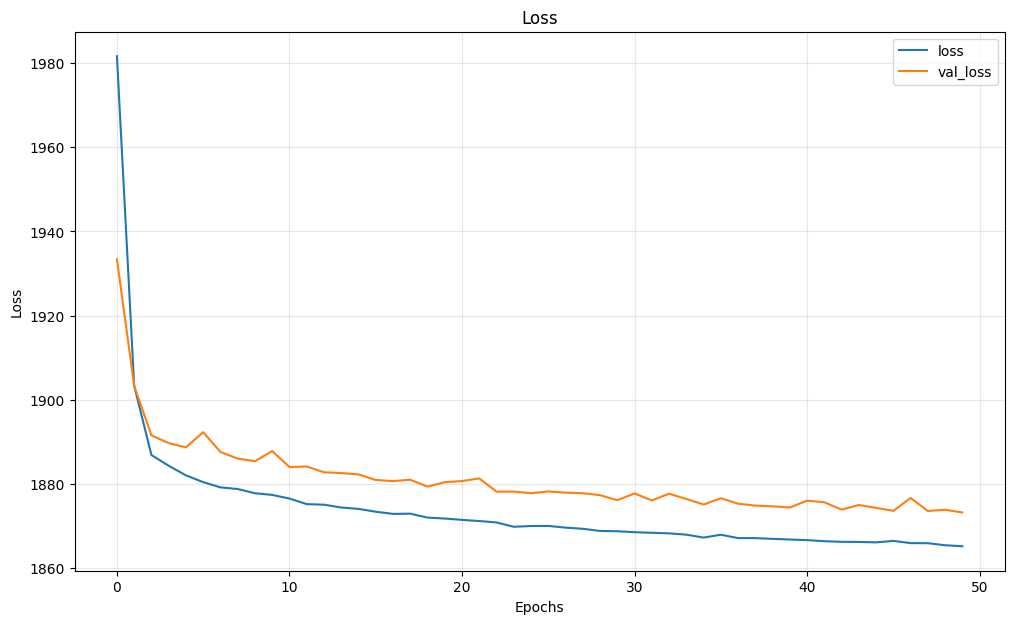

In [53]:
plt.figure(figsize=(12,7))

plt.plot(history.epoch, history.history['loss'], label="loss")
plt.plot(history.epoch, history.history['val_loss'], label="val_loss")

plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(alpha=0.3)
plt.legend()

plt.show()

In [54]:
test_loss = vae_best.evaluate(x_test_vae, x_test_vae)

63/63 [==============================] - 0s 2ms/step - loss: 1873.2445


In [56]:
mse_loss, bce_loss = calculate_reconstruction_losses(x_test_vae, x_test_pred)
(mse_loss, bce_loss)

In [55]:
x_test_pred = vae_best.predict(x_test_vae)

63/63 [==============================] - 0s 2ms/step


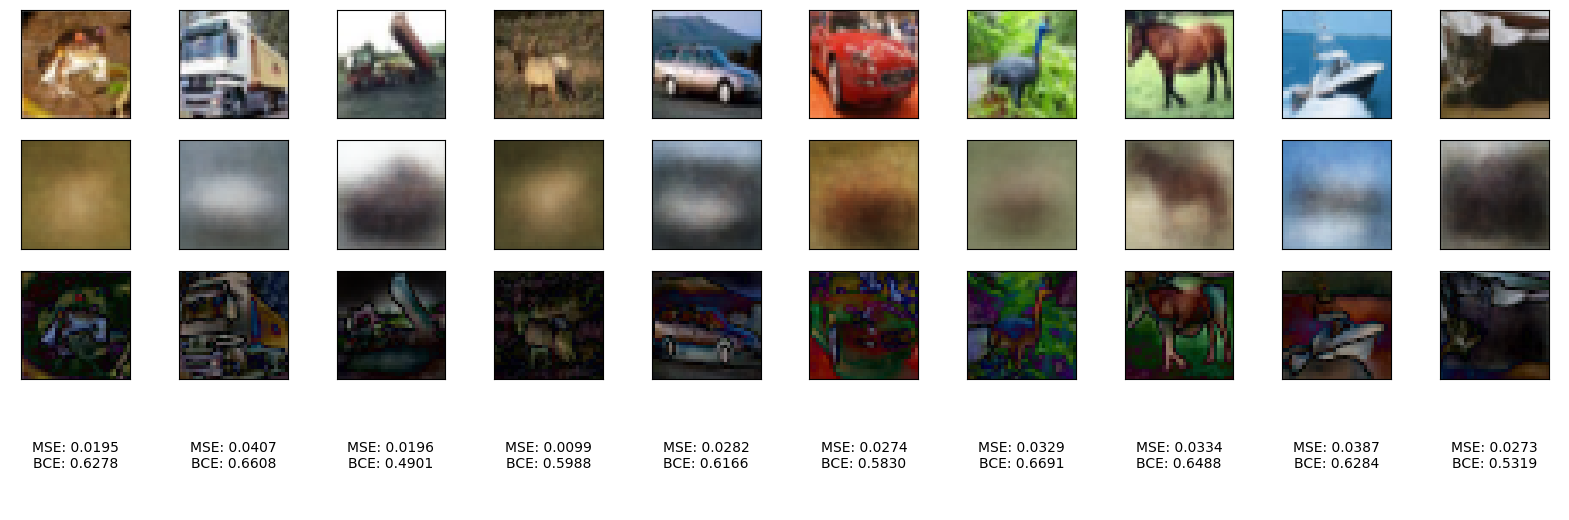

In [57]:
n = 10  # How many image rows, we will display
plt.figure(figsize=(20, 6 + 0.5))  # Adjust the figure size to accommodate three rows
for i in range(n):
    # Display original
    ax = plt.subplot(4, n, i + 1)
    original_img = x_test_vae[i].reshape(32,32,3)
    plt.imshow(original_img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(4, n, i + 1 + n)
    reconstructed_img = x_test_pred[i].reshape(32,32,3)
    plt.imshow(reconstructed_img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display difference
    ax = plt.subplot(4, n, i + 1 + n * 2)
    difference = np.abs(original_img - reconstructed_img)
    plt.imshow(difference)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Calculate losses
    mse_loss, bce_loss = calculate_reconstruction_losses(original_img, reconstructed_img)

    # Add captions with losses
    ax = plt.subplot(4, n, i + 1 + n * 3)
    plt.axis('off')
    loss_caption = f"MSE: {mse_loss:.4f}\nBCE: {bce_loss:.4f}"
    plt.text(0.5, 0.5, loss_caption, ha='center', va='center', fontsize=10, transform=ax.transAxes)

plt.show()

In [58]:
# Build a model to project inputs on the latent space
vae_encoder_best = Model(x, z_mean)

63/63 [==============================] - 0s 2ms/step


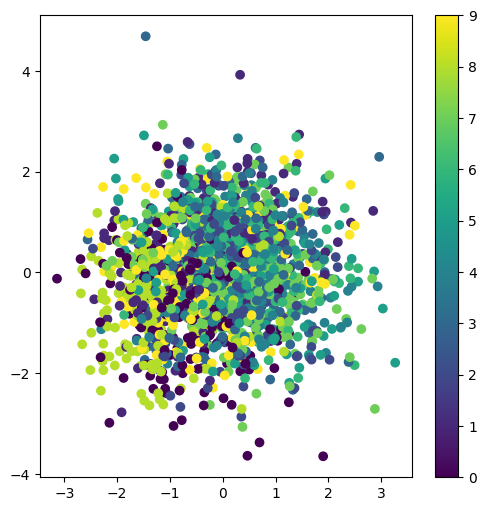

In [59]:
# Display a 2D plot of the digit classes in the latent space
x_test_encoded = vae_encoder_best.predict(x_test_vae, batch_size=batch_size)
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

In [60]:
# Display a 2D plot of the digit classes in the latent space
x_test_encoded = ae_encoder_best.predict(x_test, batch_size=batch_size)
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

NameError: ignored